In [ ]:
# Importando bibliotecas
import time
import struct
import filecmp
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
# Lendo arquivo
arqOriginal = open("corpus16MB.txt", "rb").read()
arqOriginal = arqOriginal.decode('ISO-8859-1')

In [ ]:
# Declarando parametros
k = []
rc = []
rcIdeal = []
tempoProc = []

# LZW 
É um algoritmo de codificação de palavras cuja idéia principal
é ir construindo um dicionário de símbolos ou palavras conforme a
informação (neste caso texto) vai sendo processado pelo algoritmo. No início da codificação, o dicionário LZW possui inicialmente como palavras apenas os 256 caracteres da tabela ASCII.

Durante o processo de análise, o dicionário vai criando novas palavras
a partir de combinações de pelo menos 2 caracteres encontrados no texto. A cada nova combinação encontrada, é criada uma nova entrada no dicionário que será utilizada para codificações futuras. Ao final do processo de codificação, teremos um dicionário de combinações de palavras que poderá ser utilizado para codificar o texto, possivelmente reduzindo a quantidade de espaço gasto para seu
armazenamento.

In [ ]:
# implementação do LZW
# COMPRESSOR
for K in range(9,17): # percorre os valores de K solicitados 9 a 16
    
    comeco = time.time()
    dicionario = {}
    novoValor = 256
    arqComprimido = []
    novo = ''
    velho = ''

    for i in range(2**8):
        dicionario[i.to_bytes(1, 'big')] = i

    for letra in tqdm(arqOriginal):
        novo = velho + letra
        
        if novo.encode('ISO-8859-1') not in dicionario: 
            if len(dicionario) < 2**K:
                dicionario[novo.encode('ISO-8859-1')] = novoValor
                novoValor += 1
            
            numCod = dicionario[velho.encode('ISO-8859-1')]
            arqComprimido.append(numCod)
            velho = letra

        else:
            velho = novo

    numCod = dicionario[velho.encode('ISO-8859-1')]
    arqComprimido.append(numCod)
    
    final = time.time()
    
    outFile = open("saidaCompressao\saidaComprimida" + str(K) + ".txt" , "wb")
    
    for i in arqComprimido:
        outFile.write(struct.pack('H', i))
        
    print('K = %d  ||  Tamanho: %d -> %d' %(K,len(arqOriginal),len(arqComprimido)))
    print('=======================================================================')

    rc.append(8/(len(arqComprimido) * 16 / len(arqOriginal))) 
    rcIdeal.append(8/(len(arqComprimido) * K / len(arqOriginal))) 
    
    tempoProc.append(final-comeco)
    
    outFile.close()

    k.append(K)

100%|██████████| 15637138/15637138 [00:17<00:00, 881731.34it/s]


K = 9  ||  Tamanho: 15637138 -> 9046854


100%|██████████| 15637138/15637138 [00:16<00:00, 960521.25it/s]


K = 10  ||  Tamanho: 15637138 -> 7338381


100%|██████████| 15637138/15637138 [00:16<00:00, 955453.83it/s]


K = 11  ||  Tamanho: 15637138 -> 6134026


100%|██████████| 15637138/15637138 [00:15<00:00, 988548.86it/s]


K = 12  ||  Tamanho: 15637138 -> 5330170


100%|██████████| 15637138/15637138 [00:15<00:00, 998156.14it/s] 


K = 13  ||  Tamanho: 15637138 -> 4712040


100%|██████████| 15637138/15637138 [00:15<00:00, 1017617.95it/s]


K = 14  ||  Tamanho: 15637138 -> 4199068


100%|██████████| 15637138/15637138 [00:15<00:00, 977522.49it/s]


K = 15  ||  Tamanho: 15637138 -> 3766604


100%|██████████| 15637138/15637138 [00:16<00:00, 951055.99it/s]


K = 16  ||  Tamanho: 15637138 -> 3396767


# Gerando Gráficos 

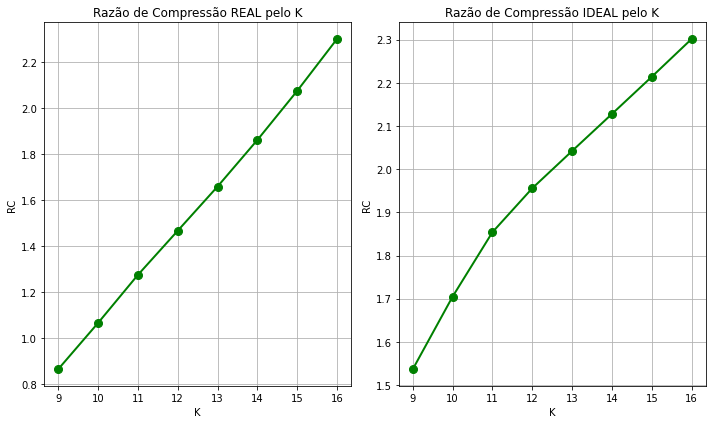

In [ ]:
# Gráfico da razao de compressão Real X K 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
ax[0].plot(k, rc, 'go-', linewidth=2, markersize=8)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].set(xlabel='K', ylabel='RC', title='Razão de Compressão REAL pelo K')
ax[0].grid()

# Gráfico da Razão de Compressão Ideal X K
ax[1].plot(k, rcIdeal, 'go-', linewidth=2, markersize=8)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].set(xlabel='K', ylabel='RC', title='Razão de Compressão IDEAL pelo K')
ax[1].grid()

plt.tight_layout()
plt.show()


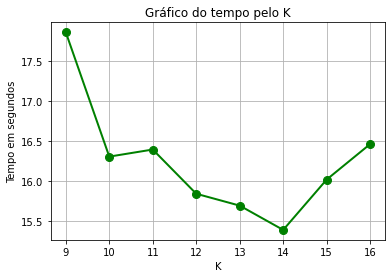

In [ ]:
# Gerando gráfico Tempo X K
fig, bx = plt.subplots()
bx.plot(k, tempoProc, 'go-', linewidth=2, markersize=8)
bx.xaxis.set_major_locator(ticker.MultipleLocator(1))
bx.set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
bx.grid()
plt.show()

In [ ]:
# implementação do LZW
# DESCOMPRESSOR
for K in range(9,17):
    arqModificado = open("saidaCompressao\saidaComprimida" + str(K) + ".txt", "rb").read()
    msgInt = []
    newKey = 256
    comeco = time.time()
    descomprimida = ''
    dicionario = {}
    
    for i in range(0,len(arqModificado),2):
        arr = bytearray([arqModificado[i],arqModificado[i+1]])
        msgInt.append(struct.unpack('H', arr)[0])

    for i in range(2**8):
        dicionario[i] = chr(i)  

    for i in tqdm(msgInt):
        if len(dicionario) <= 2**K:
            # update do elemento anterior
            if newKey > 256:   
                dicionario[newKey-1] += dicionario[i][0]
        descomprimida += dicionario[i]
        # criação elemento atual 
        dicionario[newKey] = dicionario[i]  
        newKey += 1

    final = time.time()

    outFile = open("saidaDEScompressao\saidaDescomprimida" + str(K) + ".txt" , "wb")
    for i in descomprimida:
        outFile.write(struct.pack('B', ord(i)))

    tempoProc.append(final-comeco)
    
    print('K = %d  ||  Tamanho: %d -> %d' %(K,len(msgInt),len(descomprimida)))
    print('Tempo %f segundos\n' % (final-comeco))
    print('=======================================================================')

    outFile.close()


100%|██████████| 9046854/9046854 [00:09<00:00, 911428.29it/s]


K = 9  ||  Tamanho: 9046854 -> 15637138
Tempo 16.941451 segundos



100%|██████████| 7338381/7338381 [00:07<00:00, 955655.53it/s] 


K = 10  ||  Tamanho: 7338381 -> 15637138
Tempo 13.096710 segundos



100%|██████████| 6134026/6134026 [00:06<00:00, 920137.62it/s]


K = 11  ||  Tamanho: 6134026 -> 15637138
Tempo 11.167416 segundos



100%|██████████| 5330170/5330170 [00:05<00:00, 913810.41it/s]


K = 12  ||  Tamanho: 5330170 -> 15637138
Tempo 9.761962 segundos



100%|██████████| 4712040/4712040 [00:05<00:00, 861184.25it/s]


K = 13  ||  Tamanho: 4712040 -> 15637138
Tempo 8.966078 segundos



100%|██████████| 4199068/4199068 [00:05<00:00, 837292.24it/s]


K = 14  ||  Tamanho: 4199068 -> 15637138
Tempo 8.113122 segundos



100%|██████████| 3766604/3766604 [00:04<00:00, 791325.44it/s]


K = 15  ||  Tamanho: 3766604 -> 15637138
Tempo 7.725772 segundos



100%|██████████| 3396767/3396767 [00:04<00:00, 750477.95it/s]


K = 16  ||  Tamanho: 3396767 -> 15637138
Tempo 7.076141 segundos



In [ ]:
filecmp.cmp('corpus16MB.txt', "saidaDEScompressao\saidaDescomprimida9.txt")

True